In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import sys
sys.path.append("../")
from nu_stats.simulation import Simulation
from nu_stats.fqutils import FqStructure, plot_loghist

In [4]:
Emin = 1e5 * u.GeV
Emax = 1e8 * u.GeV


In [5]:
fq = FqStructure()
fq.construct_atm_bg_energy_likelihood(
    Emin = Emin,
    Emax = Emax,
    n_Esim = 100000,
    Nbins = 50
)


Generating atmospheric background energy likelihood..
Running Esim
done
Separate marginalized energy likelihood generated for bg.


In [6]:
E_sim_z =0.3

In [7]:
cd examples/bayes_hierarchical_model/

/home/vmu/nu_stats/examples/bayes_hierarchical_model


In [8]:
fq.construct_source_energy_likelihood(
    z = E_sim_z,
    Emin = Emin,
    Emax = Emax,
    min_index = 1.5,
    max_index = 4.0,
    n_Esim = 100000,
    Nbins = 25,
    prefab_likelihood_file='tmp/True0.3_25lik.npy'
)

Generating marginalized energy likelihood..
Marginalized energy likelihood generated.


# P(E_det | γ)

In [9]:
test_idx = 1.5
sim_z = E_sim_z
sim = Simulation(
    1*u.erg/u.s,
    test_idx,
    sim_z,
    0/(u.GeV * u.cm**2 * u.s),
    Emin = 1e5 * u.GeV,
    Emax = 1e8 * u.GeV,
    Enorm = 1e5 * u.GeV,
    N_events = 10000
)
sim.run(seed=62)

/home/vmu/Envs/exj/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


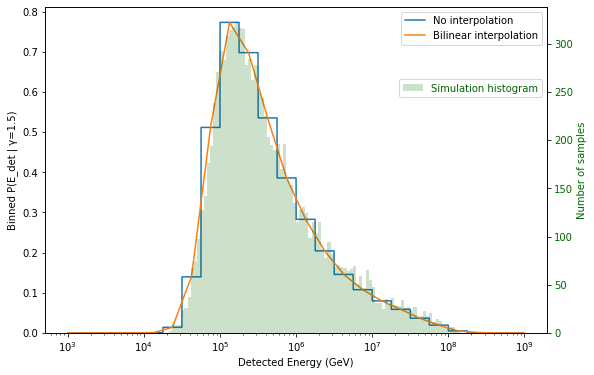

In [10]:
fig, ax = plt.subplots()

fq.energy_likelihood.plot_pdf_at_idx(test_idx, interp=0)
fq.energy_likelihood.plot_pdf_at_idx(test_idx, scaled_plot=False)
plt.legend(['No interpolation','Bilinear interpolation'], loc='upper right')
ax.set_xlabel('Detected Energy (GeV)')
ax.set_ylabel(f'Binned P(E_det | γ={test_idx})')
ax.set_ylim(0,(ax.get_ylim()[1]))

axh = ax.twinx()

plot_loghist(sim.Edet.value, bins=100, color=(0,0.4,0,0.2))
sim_col = (0,0.4,0)
plt.legend(['Simulation histogram'],
    loc = 'center right',
    bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),
    labelcolor = sim_col
)
axh.set_ylabel('Number of samples', color=sim_col)
axh.tick_params(axis='y', labelcolor=sim_col)

fig.set_size_inches(*(fig.get_size_inches()*1.5))
fig.show()

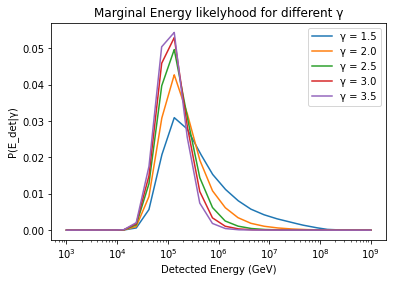

In [11]:
fig, ax = plt.subplots()
idxs = [test_idx+i for i in np.arange(0,2.5,.5)]
for idx in idxs:
    fq.energy_likelihood.plot_pdf_at_idx(idx)
ax.legend([f'γ = {i}' for i in idxs])
ax.set_title('Marginal Energy likelyhood for different γ')
ax.set_xlabel('Detected Energy (GeV)')
ax.set_ylabel(f'P(E_det|γ)')
fig.show()


## For fixed E

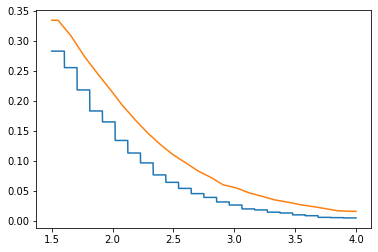

In [12]:
fq.energy_likelihood.plot_pdf_at_E(1e6, 0)
fq.energy_likelihood.plot_pdf_at_E(1e6, scaled_plot=False)

## Heatmap

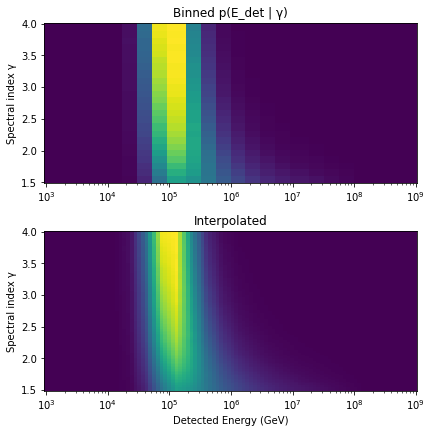

In [41]:
fig, ax = plt.subplots(2,1)
plt.tight_layout()
fig.set_size_inches(fig.get_size_inches()[0],fig.get_size_inches()[1]*1.5)
plt.sca(ax[0])
ax[0].set_title('Binned p(E_det | γ)')

ax[0].set_ylabel('Spectral index γ')
ax[1].set_ylabel('Spectral index γ')

fq.energy_likelihood.plot_pdf_meshgrid(interp = 0)
plt.sca(ax[1])
ax[1].set_xlabel('Detected Energy (GeV)')
ax[1].set_title('Interpolated')
fq.energy_likelihood.plot_pdf_meshgrid()
plt.show()

# Comparison to new Simulation at higher index

In [15]:
sim_idx = 3.5
sim_z = E_sim_z
sim = Simulation(
    1*u.erg/u.s,
    sim_idx,
    sim_z,
    0/(u.GeV * u.cm**2 * u.s),
    Emin = 1e5 * u.GeV,
    Emax = 1e8 * u.GeV,
    Enorm = 1e5 * u.GeV,
    N_events = 10000
)
sim.run(seed=62)

/home/vmu/Envs/exj/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


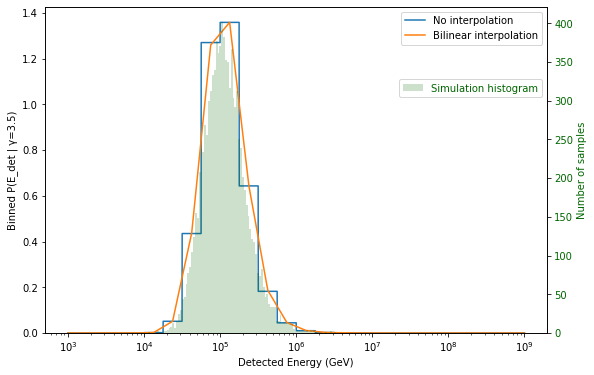

In [16]:
fig, ax = plt.subplots()

fq.energy_likelihood.plot_pdf_at_idx(sim_idx, interp=0)
fq.energy_likelihood.plot_pdf_at_idx(sim_idx, scaled_plot=False)
plt.legend(['No interpolation','Bilinear interpolation'], loc='upper right')
ax.set_xlabel('Detected Energy (GeV)')
ax.set_ylabel(f'Binned P(E_det | γ={sim_idx})')
ax.set_ylim(0,(ax.get_ylim()[1]))

axh = ax.twinx()

plot_loghist(sim.Edet.value, bins=100, color=(0,0.4,0,0.2))
sim_col = (0,0.4,0)
plt.legend(['Simulation histogram'],
    loc = 'center right',
    bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),
    labelcolor = sim_col
)
axh.set_ylabel('Number of samples', color=sim_col)
axh.tick_params(axis='y', labelcolor=sim_col)

fig.set_size_inches(*(fig.get_size_inches()*1.5))
fig.show()


## Now with atmospheric bg

In [17]:
sim2 = Simulation(
    atm_flux_norm = 2.5e-18/(u.GeV * u.cm**2 * u.s),
    Emin = 1e5 * u.GeV,
    Emax = 1e8 * u.GeV,
    Enorm = 1e5 * u.GeV,
    N_events = 10000
)
sim2.run(seed=635)


index is implicitly 3.7 from Simulation, ad redshift is 0, which will make the difference between the MEL and Edet histogram.


In [18]:
sim2idx = 3.7

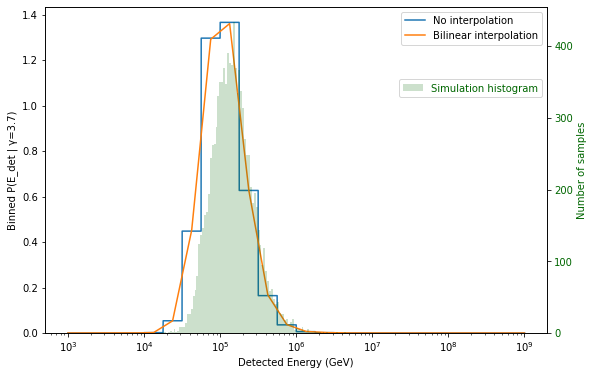

In [19]:
fig, ax = plt.subplots()

fq.energy_likelihood.plot_pdf_at_idx(sim2idx, interp=0)
fq.energy_likelihood.plot_pdf_at_idx(sim2idx, scaled_plot=False)
plt.legend(['No interpolation','Bilinear interpolation'], loc='upper right')
ax.set_xlabel('Detected Energy (GeV)')
ax.set_ylabel(f'Binned P(E_det | γ={sim2idx})')
ax.set_ylim(0,(ax.get_ylim()[1]))

axh = ax.twinx()

plot_loghist(sim2.Edet.value, bins=100, color=(0,0.4,0,0.2))
sim_col = (0,0.4,0)
plt.legend(['Simulation histogram'],
    loc = 'center right',
    bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),
    labelcolor = sim_col
)
axh.set_ylabel('Number of samples', color=sim_col)
axh.tick_params(axis='y', labelcolor=sim_col)

fig.set_size_inches(*(fig.get_size_inches()*1.5))
fig.show()

## fq.bg_energy_likelihood should however fit:

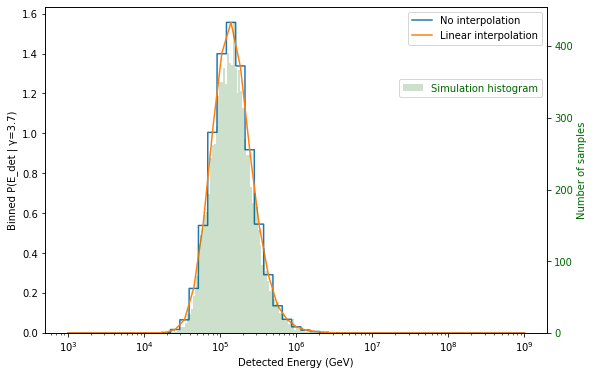

In [20]:
fig, ax = plt.subplots()

fq.bg_energy_likelihood.plot_pdf(interp=0)
fq.bg_energy_likelihood.plot_pdf(scaled_plot=False)
plt.legend(['No interpolation','Linear interpolation'], loc='upper right')
ax.set_xlabel('Detected Energy (GeV)')
ax.set_ylabel(f'Binned P(E_det | γ={sim2idx})')
ax.set_ylim(0,(ax.get_ylim()[1]))

axh = ax.twinx()

plot_loghist(sim2.Edet.value, bins=100, color=(0,0.4,0,0.2))
sim_col = (0,0.4,0)
plt.legend(['Simulation histogram'],
    loc = 'center right',
    bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),
    labelcolor = sim_col
)
axh.set_ylabel('Number of samples', color=sim_col)
axh.tick_params(axis='y', labelcolor=sim_col)

fig.set_size_inches(*(fig.get_size_inches()*1.5))
fig.show()

# Saving the Energy likelihoods

In [21]:
# fq.energy_likelihood.save_histogram()

In [22]:
# fq.bg_energy_likelihood.save_histogram()